In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [137]:
# ECM:
ecm_data = pd.read_csv('../config/ecm_2_walls_cilindro.tsv', sep='\t', header=None, names=['x', 'y', 'z'])
# Filter data where z=5
ecm_data_filtered = ecm_data[ecm_data['z'] == 5]

# cells:
# Read the data file (assuming it's comma or space separated)
cells_data = pd.read_csv('../config/cilindro_cells.csv', sep=',', header=None, names=['x', 'y', 'z', 'type'])
cells_data[['x']] = (((cells_data[['x']] - 10) / 20) + 64).astype(int)
cells_data[['y']] = (((cells_data[['y']] - 10) / 20) + 43).astype(int)
cells_data[['z']] = (((cells_data[['z']] - 10) / 20) + 2).astype(int)
# Filter data where z=2 which is 5 in the other datasets
cells_data_filtered = cells_data[cells_data['z'] == 2]

In [ ]:
# endothelium:
endo_data = pd.read_csv('../config/cilindro_endo_doble_originalrealtissue.tsv', sep='\t', header=None, names=['x', 'y', 'z'])
endo_data[['x']] = (endo_data[['x']] - 1).astype(int)
endo_data_filtered = endo_data[endo_data['z'] == 5]

# endo_data = pd.read_csv('../config/cilindro_endo_doble.tsv', sep='\t', header=None, names=['x', 'y', 'z'])
# endo_data_filtered = endo_data[endo_data['z'] == 5]

In [139]:
print(sorted(ecm_data['z'].unique())) 
print(sorted(endo_data['z'].unique()))
print(sorted(cells_data['z'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[5, 6, 7, 8, 9]
[0, 1, 2, 3, 4]


In [140]:
# Create a pivot table for the heatmap
# First find the dimensions of the grid
x_max = int(ecm_data_filtered['x'].max())
y_max = int(ecm_data_filtered['y'].max())

# Create an empty grid
grid = np.zeros((y_max + 1, x_max + 1))

# Fill the grid with 1s of ECM
for _, row in ecm_data_filtered.iterrows():
    grid[int(row['y']), int(row['x'])] = 1
    
# Fill the grid with 2s of endothelium
for _, row in endo_data_filtered.iterrows():
    grid[int(row['y']), int(row['x'])] = 2

# for _, row in cells_data_filtered.iterrows():
#     grid[int(row['y']), int(row['x'])] = 3
    
# Fill cells with different values based on their type
for _, row in cells_data_filtered.iterrows():
    # Assuming types start from 1, add an offset to distinguish from ECM and endothelium
    grid[int(row['y']), int(row['x'])] = row['type'] + 3 


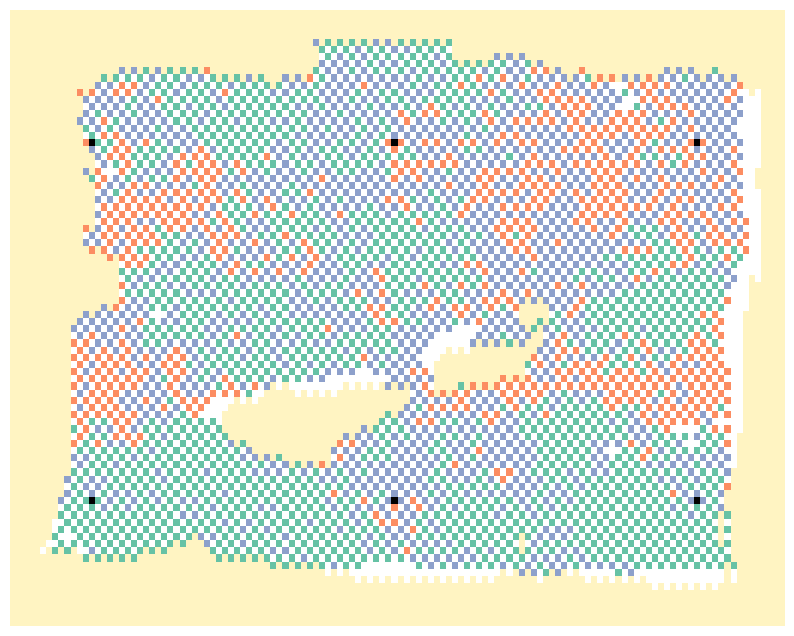

In [141]:
# Create custom colormap for different cell types
n_types = len(cells_data_filtered['type'].unique())
colors = ['white', '#FFF4C2', 'black'] + sns.color_palette("Set2", n_types).as_hex()
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grid, 
            cmap=custom_cmap,  
            cbar=False,     
            xticklabels=False, 
            yticklabels=False)

plt.gca().invert_yaxis()
plt.show()

In [142]:
# Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(grid, 
#             cmap='YlOrBr', 
#             cbar=False,     
#             xticklabels=False, 
#             yticklabels=False)
# plt.gca().invert_yaxis()
# plt.show()